# Tasks 4 : 
        *  SPAM SMS DETECTION
 Build an AI model that can classify SMS messages as spam or
 legitimate. Use techniques like TF-IDF or word embeddings with
 classifiers like Naive Bayes, Logistic Regression, or Support Vector
 Machines to identify spam messages
 

# Importing the Libraries

In [36]:
import pandas as pd
import numpy as np
import re 
import matplotlib.pyplot as plt
import seaborn as sns


# NLTK LIBRARIES
import nltk 


# stop words
from nltk.corpus import stopwords

# Lemmatization
from nltk.stem import WordNetLemmatizer


# Wordcloud
from wordcloud import wordcloud

nltk.download('stopwords')
nltk.download('wordnet')



# sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report

from scikitplot.metrics import plot_confusion_matrix

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ABC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ABC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Load the CSV file into a DataFrame

In [37]:
df = pd.read_csv(r"C:\Users\ABC\Desktop\All Taskss\codsoft tasks\Task 4\dataset\spam.csv",encoding='ISO-8859-1')


* Select only the relevant columns


In [38]:
df = df[['v1', 'v2']]

In [39]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [40]:
df['v1'].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

<Axes: xlabel='v1'>

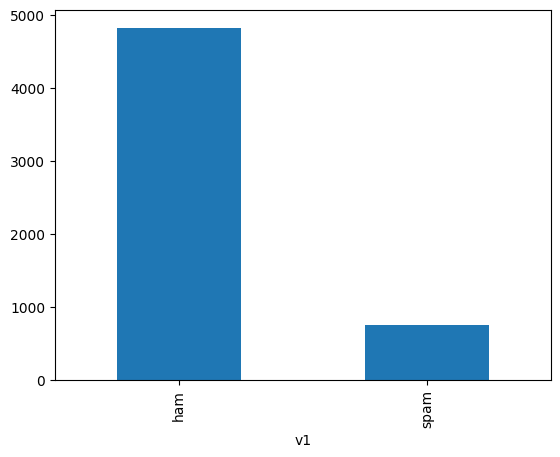

In [41]:
df['v1'].value_counts().plot.bar()

In [42]:
df['v1'].replace(to_replace=['ham'],value=1,inplace=True)
df['v1'].replace(to_replace=['spam'],value=0,inplace=True)

* Changing the columns names to Emotion and Texts

In [47]:
df.rename(columns={'v1':'Emotion','v2':'Texts'},inplace=True)

In [49]:
df.head()

,Emotion,Texts
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


* WordNetLemmatizer

In [50]:
lm = WordNetLemmatizer()

In [52]:
lok = df['Texts'].head()

In [53]:
def tranformation(df_column):
  output = []
  for i in df_column:
    new_text = re.sub('[^a-zA-Z]',' ',str(i))
    new_text = new_text.lower()
    new_text = new_text.split()
    new_text = [lm.lemmatize(j) for j in new_text if j not in set(stopwords.words('english'))]
    output.append(' '.join(str(k) for k in new_text))
  
  return output

In [54]:
var = tranformation(df['Texts'])

In [55]:
var

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

# Word cloud

In [56]:
word = ''
for i in var:
    for j in i:
        word += " ".join(j)

In [57]:
word

'go jurong point crazy available bugis n great world la e buffet cine got amore watok lar joking wif u onifree entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c applyu dun say early hor u c already saynah think go usf life around thoughfreemsg hey darling week word back like fun still tb ok xxx std chgs send rcveven brother like speak treat like aid patentper request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertunewinner valued network customer selected receivea prize reward claim call claim code kl valid hourmobile month u r entitled update latest colour mobile camera free call mobile update co freegonna home soon want talk stuff anymore tonight k cried enough todaysix chance win cash pound txt csh send cost p day day tsandcs apply reply hl infourgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rwsearching right word thank breather promise wont take help gra

In [58]:
from wordcloud import WordCloud

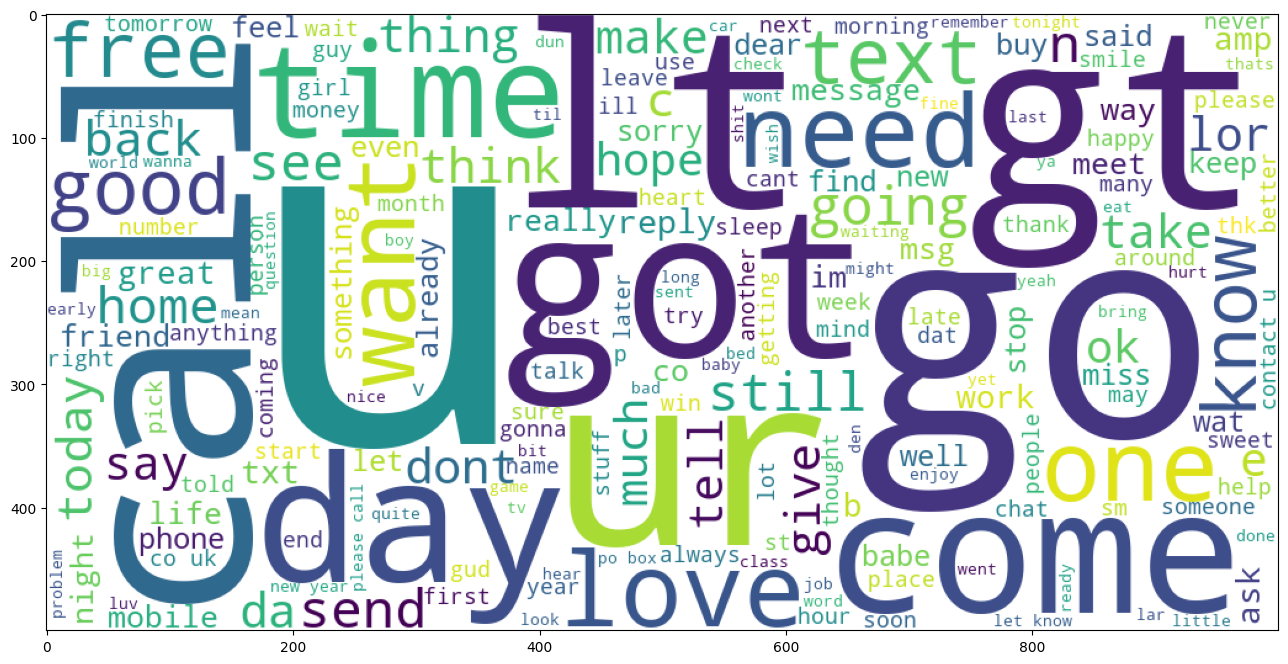

In [59]:
plt.figure(figsize=(20,8))
wc = WordCloud(width=1000,height=500,
               background_color='White'
               ,min_font_size=10).generate(word)
plt.imshow(wc)

# Bag of Words model

In [61]:
cv = CountVectorizer(ngram_range=(1,2))
traindata = cv.fit_transform(var)
x_train = traindata
y_train = df['Emotion']

In [62]:
x_train

<5572x36648 sparse matrix of type '<class 'numpy.int64'>'
	with 86284 stored elements in Compressed Sparse Row format>

# hyper paramater Turing

In [63]:
parameters = {'max_features':('auto', 'sqrt'),
              'n_estimators': [500, 1000, 1500],
              'max_depth': [5,10, None],
              'min_samples_leaf':[1, 2, 5, 10],
              'min_samples_split':[5, 10, 15],
              'bootstrap':[True, False]}

In [64]:
parameters

{'max_features': ('auto', 'sqrt'),
 'n_estimators': [500, 1000, 1500],
 'max_depth': [5, 10, None],
 'min_samples_leaf': [1, 2, 5, 10],
 'min_samples_split': [5, 10, 15],
 'bootstrap': [True, False]}

# model Selection and Training


In [65]:
model = RandomForestClassifier()

In [66]:
grid_search = GridSearchCV(model, 
                           parameters, 
                           cv=5,
                           return_train_score = True,
                           n_jobs=1)

In [67]:
grid_search

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 10, None],
                         'max_features': ('auto', 'sqrt'),
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [500, 1000, 1500]},
             return_train_score=True)

In [68]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [69]:
model.predict(x_train)

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [70]:
y_perd = model.predict(x_train)

In [87]:
y_perd

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)